In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, LabelEncoder

import pickle

In [3]:
df = pd.read_csv('CloudWatch_Traffic_Web_Attack.csv')

In [4]:
df.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

In [6]:
df.describe()

,bytes_in,bytes_out,response.code,dst_port
count,2.820000e+02,2.820000e+02,282.0,282.0
mean,1.199390e+06,8.455429e+04,200.0,443.0
std,4.149312e+06,2.549279e+05,0.0,0.0
min,4.000000e+01,4.400000e+01,200.0,443.0
25%,5.381500e+03,1.114200e+04,200.0,443.0
50%,1.318200e+04,1.379950e+04,200.0,443.0
75%,3.083300e+04,2.627950e+04,200.0,443.0
max,2.520779e+07,1.561220e+06,200.0,443.0


In [7]:
df.describe

<bound method NDFrame.describe of      bytes_in  bytes_out         creation_time              end_time  \
0        5602      12990  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
1       30912      18186  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
2       28506      13468  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
3       30546      14278  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
4        6526      13892  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
..        ...        ...                   ...                   ...   
277     41336      13180  2024-04-26T09:50:00Z  2024-04-26T10:00:00Z   
278      3638       3190  2024-04-26T09:50:00Z  2024-04-26T10:00:00Z   
279  25207794    1561220  2024-04-26T09:50:00Z  2024-04-26T10:00:00Z   
280      5736      12114  2024-04-26T09:50:00Z  2024-04-26T10:00:00Z   
281      9032       5862  2024-04-26T09:50:00Z  2024-04-26T10:00:00Z   

              src_ip src_ip_country_code protocol  response.code  dst_port  \
0     147.161.161.82   

In [57]:
df.columns

Index(['bytes_in', 'bytes_out', 'creation_time', 'end_time', 'src_ip',
       'src_ip_country_code', 'protocol', 'response.code', 'dst_port',
       'dst_ip', 'rule_names', 'observation_name', 'source.meta',
       'source.name', 'time', 'detection_types'],
      dtype='object')

In [58]:
for col in df.columns:
    bad_rows = df[col].astype(str).str.fullmatch(r'[\s\\n]*')
    if bad_rows.sum() > 0:
        print(f"Column: {col} has {bad_rows.sum()} anomalies")
df = df.dropna()


In [59]:
# Remove rows where *all columns* are whitespace or empty
df_cleaned = df[~df.apply(lambda row: row.astype(str).str.fullmatch(r'\s*').all(), axis=1)]
df_cleaned.to_csv('cleaned_data.csv', index=False)

In [60]:
for col in ['creation_time', 'end_time','time']:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [61]:
df['hour'] = df['time'].dt.hour
df['dayofweek'] = df['time'].dt.dayofweek
df['duration_sec'] = (df['end_time'] - df['creation_time']).dt.total_seconds()

In [62]:
categorical_cols = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))

In [63]:
df_scaled = df.copy()
df_scaled.drop(['creation_time', 'end_time', 'time'], axis=1, inplace=True)

# Apply StandardScaler to df_scaled only
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df_scaled)

# Save `df`, not `df_scaled`, so Flask app still has timestamps


In [64]:
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df['anomaly'] = iso_forest.fit_predict(scaled_array)
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})  # 1: Anomaly, 0: Normal

In [65]:
with open('anomaly_model.pkl', 'wb') as f:
    pickle.dump((iso_forest,scaler), f)

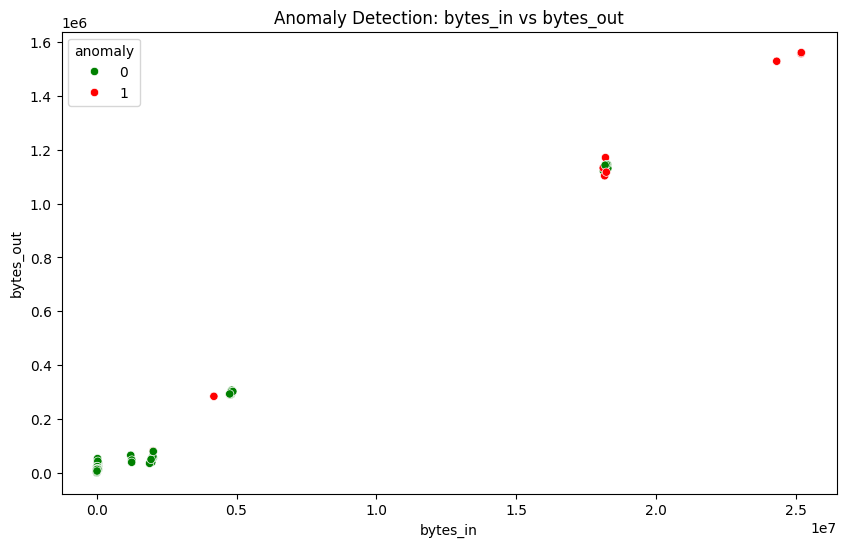

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bytes_in', y='bytes_out', hue='anomaly', palette={0: 'green', 1: 'red'})
plt.title("Anomaly Detection: bytes_in vs bytes_out")
plt.show()

In [67]:

anomalies = df[df['anomaly'] == 1]
anomalies.to_csv("anomalies_detected.csv", index=False)
print(f"Total anomalies detected: {anomalies.shape[0]}")

Total anomalies detected: 15


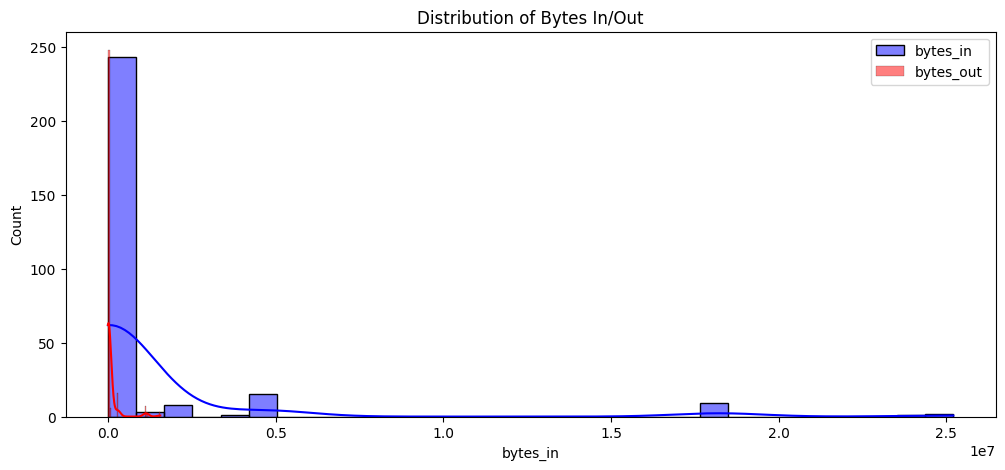

In [71]:
# Visualize bytes_in and bytes_out
plt.figure(figsize=(12,5))
sns.histplot(df['bytes_in'], bins=30, kde=True, color='blue', label='bytes_in')
sns.histplot(df['bytes_out'], bins=30, kde=True, color='red', label='bytes_out')
plt.legend()
plt.title('Distribution of Bytes In/Out')
plt.show()

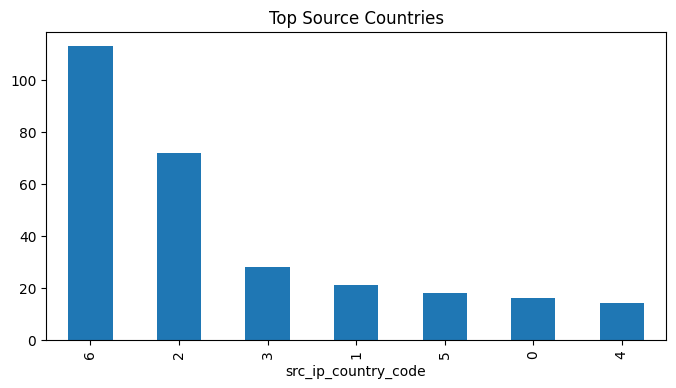

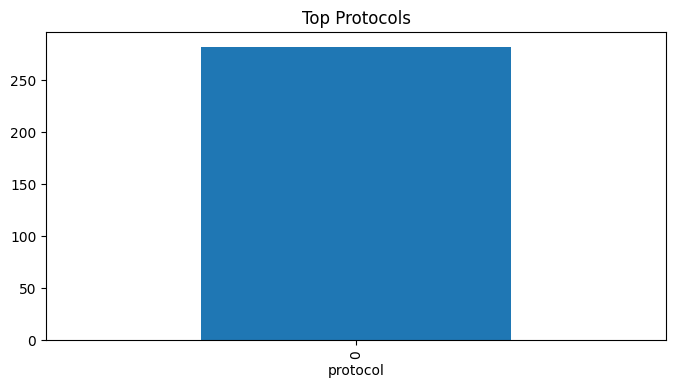

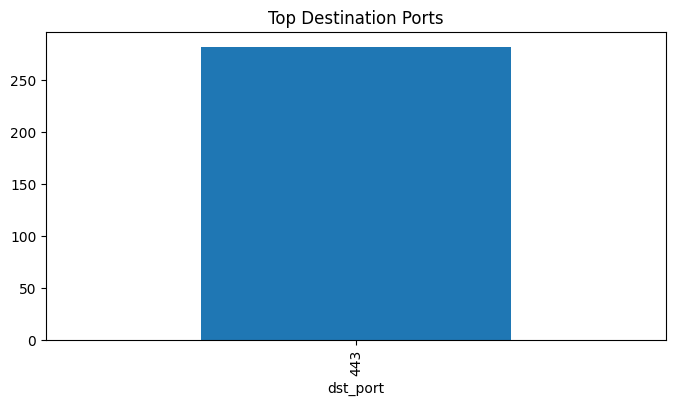

In [72]:
# Top source countries

df['src_ip_country_code'].value_counts().plot(kind='bar', figsize=(8,4), title='Top Source Countries')
plt.show()

# Top protocols

df['protocol'].value_counts().plot(kind='bar', figsize=(8,4), title='Top Protocols')
plt.show()

# Top destination ports
df['dst_port'].value_counts().head(10).plot(kind='bar', figsize=(8,4), title='Top Destination Ports')
plt.show()

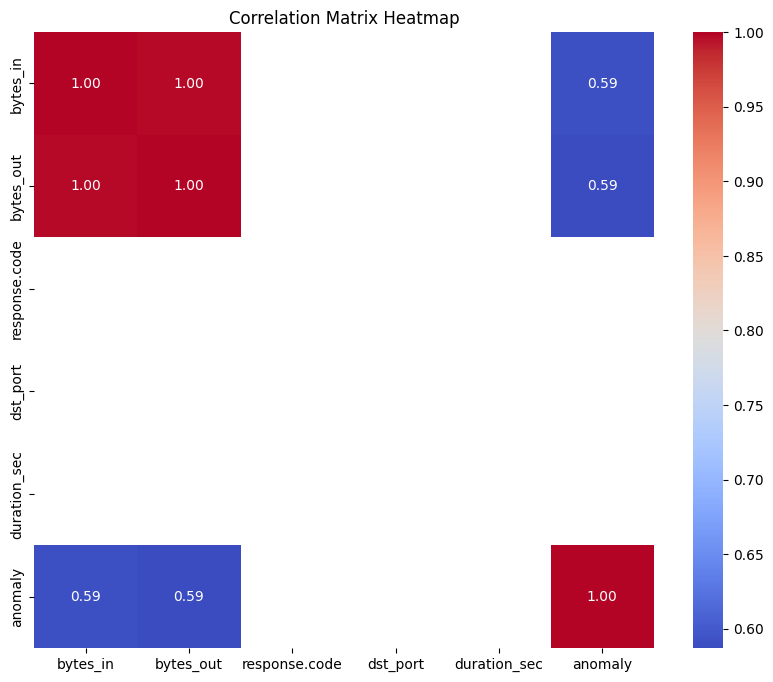

In [73]:
# Compute correlation matrix for numeric columns only
numeric_df = df.select_dtypes(include=['float64',
'int64'])
correlation_matrix_numeric = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_numeric, annot=True, fmt=".2f",
cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

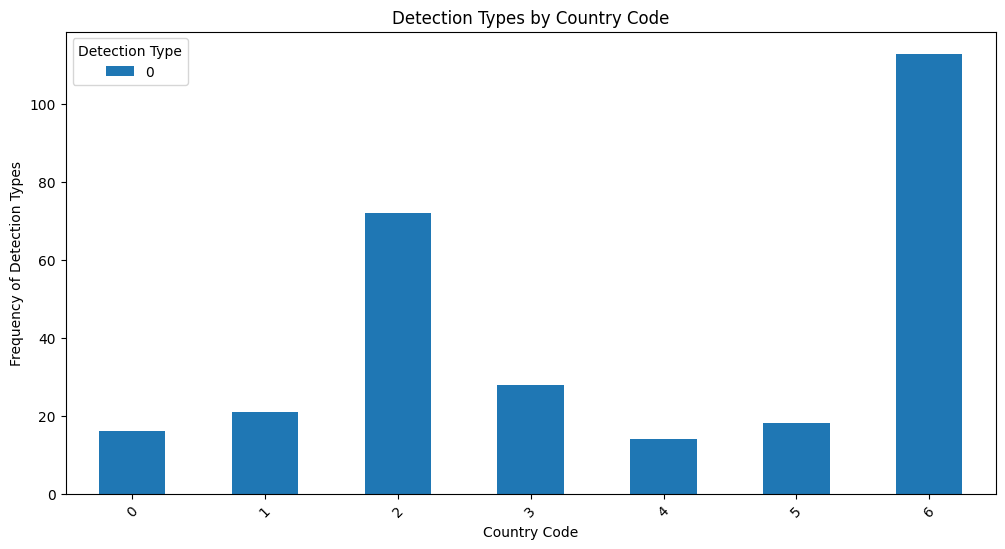

In [74]:
# Stacked Bar Chart for Detection Types by Country
# Preparing data for stacked bar chart
detection_types_by_country = pd.crosstab(df['src_ip_country_code'],
df['detection_types'])
detection_types_by_country.plot(kind='bar', stacked=True,
figsize=(12, 6))
plt.title('Detection Types by Country Code')
plt.xlabel('Country Code')
plt.ylabel('Frequency of Detection Types')
plt.xticks(rotation=45)
plt.legend(title='Detection Type')
plt.show()

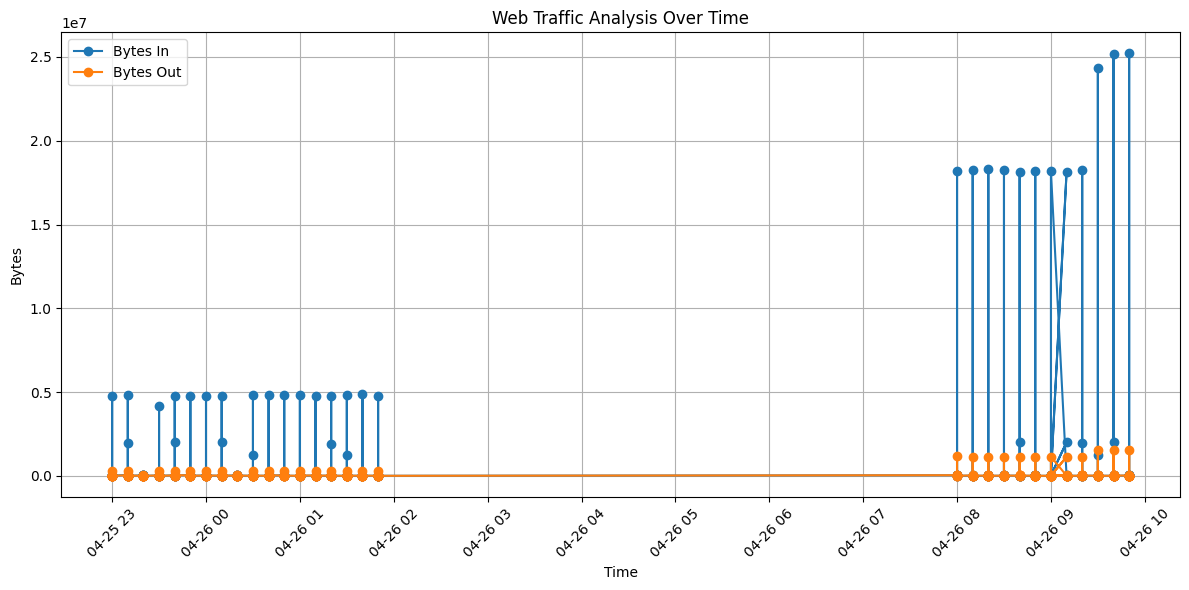

In [75]:
# Convert 'creation_time' to datetime format
df['creation_time'] = pd.to_datetime(df['creation_time'])

# Set 'creation_time' as the index
df.set_index('creation_time', inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['bytes_in'], label='Bytes In',
marker='o')
plt.plot(df.index, df['bytes_out'], label='Bytes Out',
marker='o')
plt.title('Web Traffic Analysis Over Time')
plt.xlabel('Time')
plt.ylabel('Bytes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

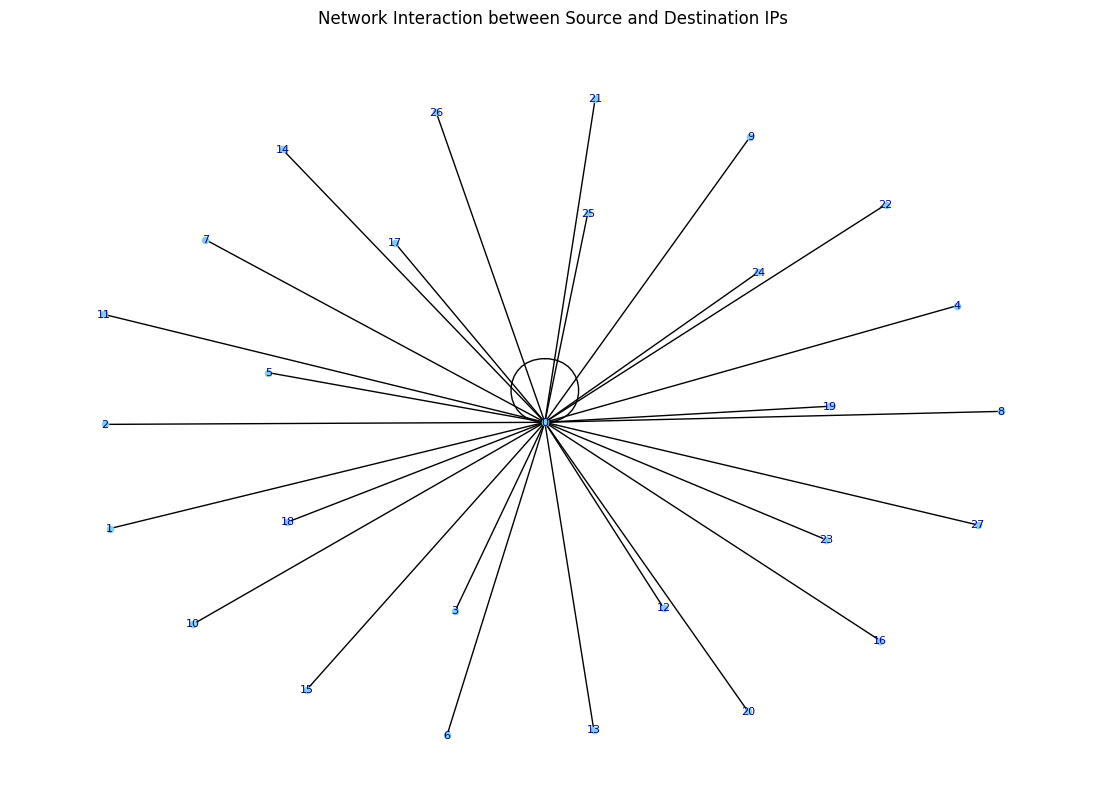

In [76]:
# Create a graph

import networkx as nx 

G = nx.Graph()

# Add edges from source IP to destination IP
for idx, row in df.iterrows():
    G.add_edge(row['src_ip'], row['dst_ip'])

# Draw the network graph
plt.figure(figsize=(14, 10))
nx.draw_networkx(G, with_labels=True, node_size=20,
font_size=8, node_color='skyblue', font_color='darkblue')
plt.title('Network Interaction between Source and Destination IPs')

plt.axis('off') # Turn off the axis

# Show the plot
plt.show()

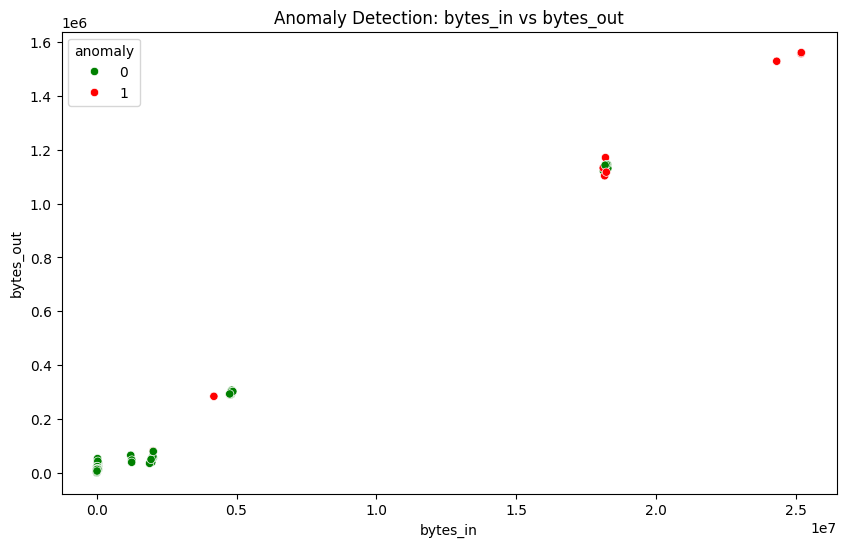

Total anomalies detected: 15


In [70]:
# ---------- Step 1: Data Cleaning and Feature Engineering ----------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle

# Load raw data
df = pd.read_csv('CloudWatch_Traffic_Web_Attack.csv')

# Drop fully empty/whitespace rows
df.dropna(inplace=True)
df = df[~df.apply(lambda row: row.astype(str).str.fullmatch(r'\s*').all(), axis=1)]

# Convert timestamps
for col in ['creation_time', 'end_time', 'time']:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Feature engineering
df['hour'] = df['time'].dt.hour
df['dayofweek'] = df['time'].dt.dayofweek
df['duration_sec'] = (df['end_time'] - df['creation_time']).dt.total_seconds()

# Encode categorical columns
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Scale data
df_scaled = df.drop(columns=['creation_time', 'end_time', 'time'])
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df_scaled)

# Train Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df['anomaly'] = model.fit_predict(scaled_array)
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})

# Save results and model
with open('anomaly_model.pkl', 'wb') as f:
    pickle.dump((model, scaler, label_encoders), f)

df.to_csv('cleaned_data.csv', index=False)
df[df['anomaly'] == 1].to_csv('anomalies_detected.csv', index=False)

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bytes_in', y='bytes_out', hue='anomaly', palette={0: 'green', 1: 'red'})
plt.title("Anomaly Detection: bytes_in vs bytes_out")
plt.show()

print(f"Total anomalies detected: {df['anomaly'].sum()}")
